In [1]:
#This project uses the Vehicle dataset from cardekho, extracted from Kaggle.com.

In [2]:
#Import the needed extensions.
import pandas as pd

In [3]:
#Read in the data.
df = pd.read_csv("car data.csv")

In [4]:
#Selling Price is the output variable.
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#Check the fundamental specifications.
df.shape

(301, 9)

In [6]:
#Describe the data.
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#Check for unique values in the categorical columns.
print(df["Fuel_Type"].unique())
print(df["Owner"].unique())
print(df["Transmission"].unique())
print(df["Seller_Type"].unique())

['Petrol' 'Diesel' 'CNG']
[0 1 3]
['Manual' 'Automatic']
['Dealer' 'Individual']


In [8]:
#Check for missing/null data.
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#Note, when we have a feature like 'Year', find the number of years a car has existed.
from datetime import date
current = date.today()
thisYear = current.year

df['CarAge'] = thisYear - df['Year']

In [12]:
#'CarAge' is a derived feature, created on my own. 
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CarAge
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'CarAge'],
      dtype='object')

In [14]:
#Discard 'Car_Name'. The car should not be used to determine the selling price in a professional setting,
#so let's discard the 'Car_Name' column.

final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'CarAge']]

In [15]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CarAge
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
final_df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CarAge
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
#Now, convert categorical variables to numerical values.
#DropFirst will prevent falling into the dummy variable trap,
#which is a scenario in which the independent variables are multicollinear
#- a scenario in which two or more variables are highly correlated; in simple terms 
#one variable can be predicted from the others. 

final_df = pd.get_dummies(final_df,drop_first=True)

In [18]:
final_df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CarAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,7,0,1,0,1
1,2013,4.75,9.54,43000,0,8,1,0,0,1
2,2017,7.25,9.85,6900,0,4,0,1,0,1
3,2011,2.85,4.15,5200,0,10,0,1,0,1
4,2014,4.60,6.87,42450,0,7,1,0,0,1


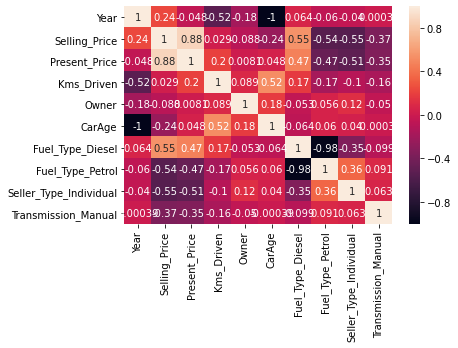

In [19]:
#Find correlation between variables.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(final_df.corr(), annot=True)
plt.show()

In [20]:
final_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CarAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
CarAge,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


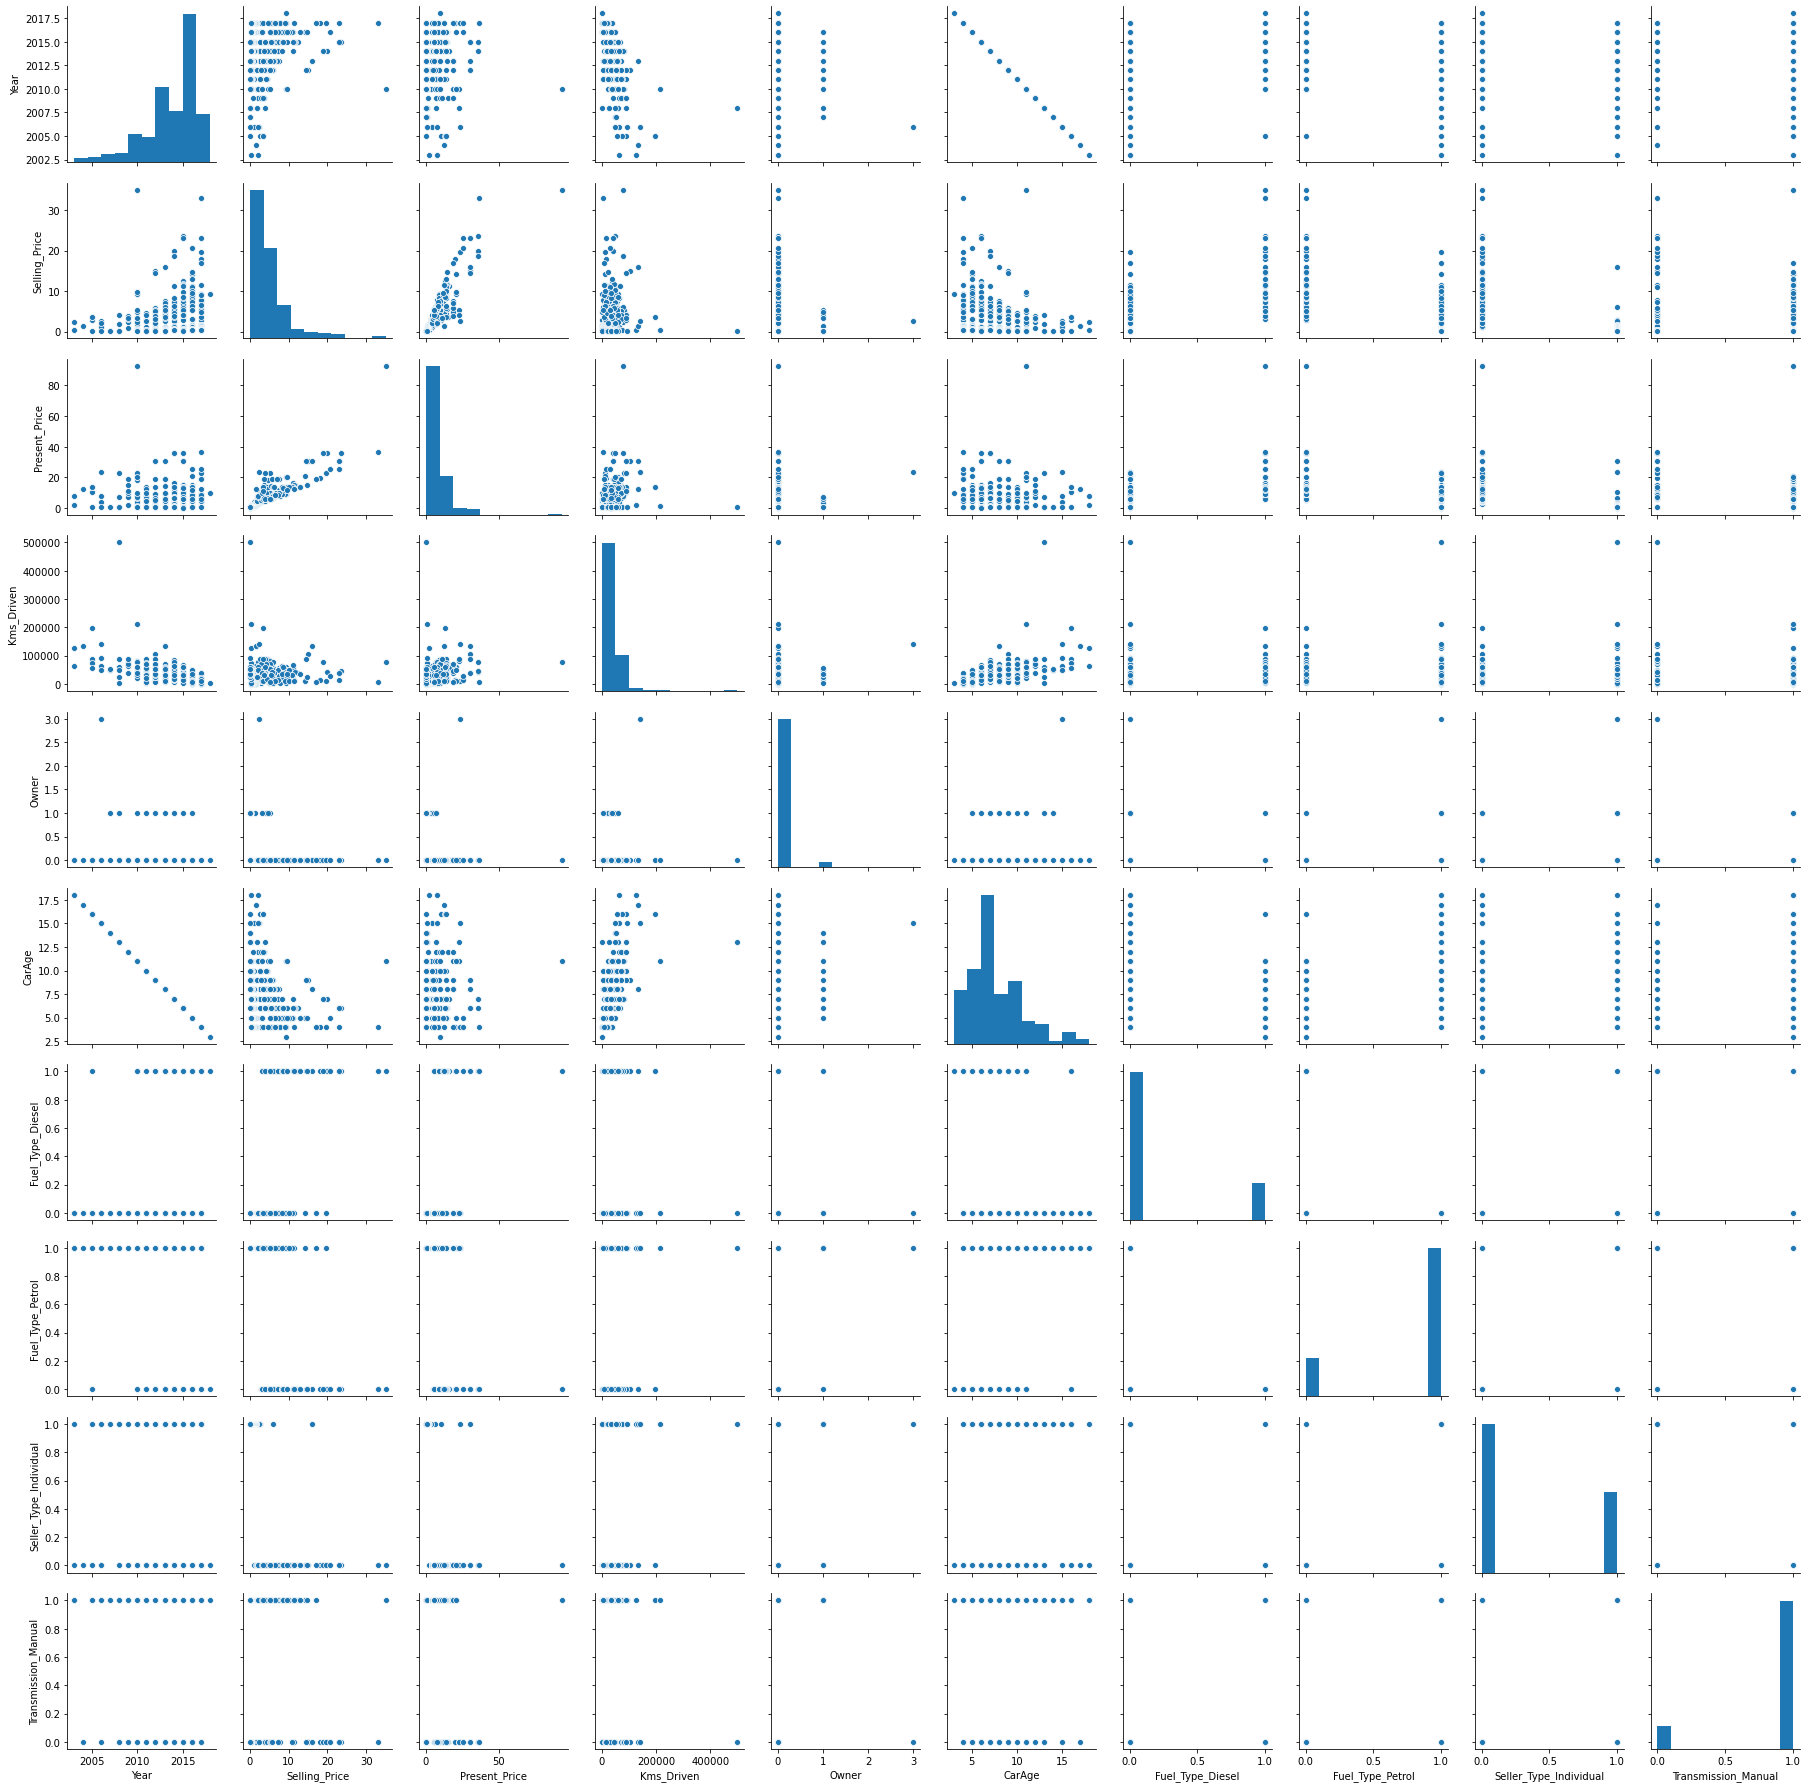

In [21]:
#Pairplots are diagrams abotu each column.
sns.pairplot(final_df)

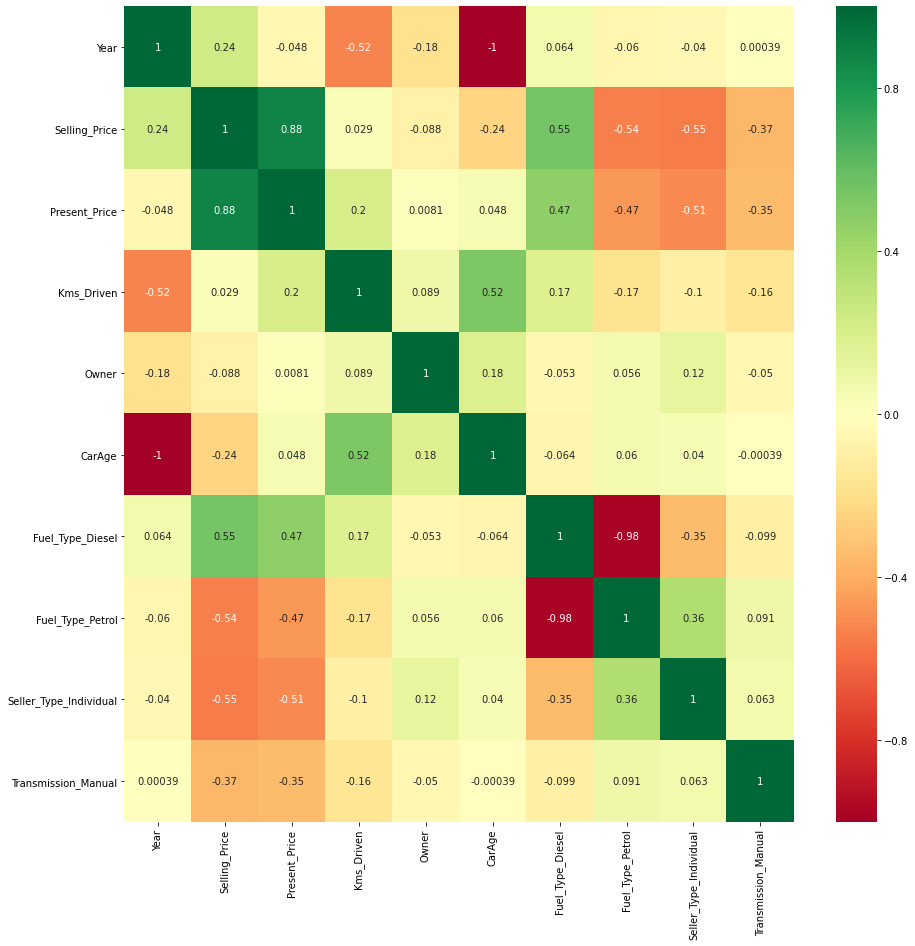

In [22]:
#To look further into the above diagrams, we must use the following. This is an alternative heatmap.
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))

#Plot heatmap.
#Note: 'annot=True' means that we will be able to see the values.
g = sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
final_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'CarAge', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [24]:
ultra_df = final_df.drop(['Year'], axis=1)

In [25]:
ultra_df.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,CarAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [26]:
#Assigne Independent and Dependent features for machine learning.
X = ultra_df.iloc[:,1:]
y = ultra_df.iloc[:,0]

##Note:[:,1:] = Don't include first column, and include everything else.
##Note:[:,0] = Include only the starting column.

In [27]:
X.head(5)

,Present_Price,Kms_Driven,Owner,CarAge,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
y.head(5)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [29]:
#Feature Importance
#"What are the important features?"
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()
model.fit(X,y)

C:\murach\SpyderPython\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [30]:
print(model.feature_importances_)

[0.38636023 0.04370513 0.00060041 0.07036069 0.21658276 0.01391941
 0.13410331 0.13436806]


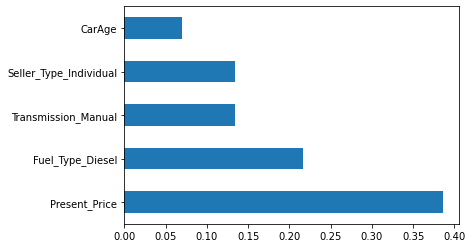

In [31]:
#Now, we must chart the graph of feature importances for better visualizations.
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [32]:
#Now, the machine learning begins.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
X_train.shape

(240, 8)

In [34]:
import numpy as np

In [35]:
#Random Froest uses decision trees.
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [36]:
##Hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [37]:
#Randomized Search CV

# Number of Trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Num of Features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

#max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
#Create a the Random Grid.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
#Use the random grid to search for the best hyperparameters
#First create the base model to tune
rf = RandomForestRegressor()

In [41]:
#cv = cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [42]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [43]:
#n_jobs = consider how many cores of the laptop/machine to use
#
#

In [44]:
#Next, we do the predictions.
predictions = rf_random.predict(X_test)
predictions

array([20.61477,  0.37344,  5.296  ,  6.97197,  6.18402,  0.43843,
        0.51526,  0.51954,  0.33699,  7.04946,  3.62196,  5.16907,
        3.46738,  5.11775,  6.124  , 12.26079,  1.00915,  3.5819 ,
        0.28884,  4.96688,  4.64686,  3.56128,  3.27518,  0.59153,
        6.99244,  0.81527,  0.79144,  4.4973 ,  0.59654,  8.38506,
        0.78673,  3.85232,  0.67647,  4.2651 ,  3.74836,  0.64382,
        6.13114,  6.83997,  1.0065 ,  4.0845 ,  8.53732,  2.90785,
        7.49665,  4.75161,  5.28639,  3.62377,  0.46089,  4.99257,
        6.20047,  2.77864,  4.88735,  8.02057, 11.3439 ,  9.14038,
        0.71152,  0.62084,  5.0805 ,  7.19424,  3.44568, 12.85489,
        6.87749])

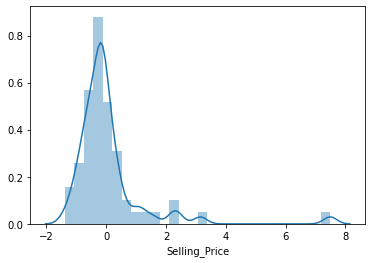

In [45]:
sns.distplot(y_test-predictions)

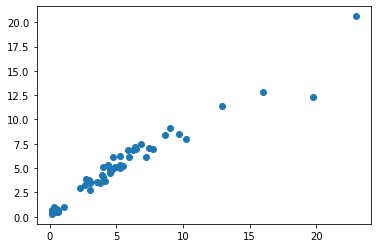

In [46]:
plt.scatter(y_test,predictions)

In [47]:
#Strong correlation; the prediction is good.
#Cross Validation = a method of checking how well a model will generalize to new data.

In [48]:
import pickle
#Open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

#Dump information to that file
pickle.dump(rf_random, file)

In [49]:
#Create the requirement.txt. MOST IMPORTANT STEP NOW!!!!!!
#Pickle file is a serialized file.
#Also, you can use any regression type (Gradient Boosting, XGBoost etc.) to try this.
#Since we are doing car prediction, we have some libraries, and need dependency management.

# What is package and dependency management?
# Software released in bundled packages this way it’s easier to manage installed programs.
# The package manager is a collection of libraries that are packaged together,
# which makes it easier to download entire package rather than each library.
# Almost every library in the package has a dependency managed by the dependency manager.
# Dependency management helps manage all the libraries required to make an application work.
# It’s incredibly beneficial when you’re dealing with complex projects and in a multi-environment.
# Dependency management also helps to keep track, update libraries faster and easier, as well as
# solve the problem then one package will depend on another package.
# Every programming language has its flavor of dependency manager.
# To summarize all above :
    
# The library is a collection of already pre-written code.
# The package is a collection of libraries that are built on each other or
# using each other one way or another.

In [54]:
#pip freeze requirements.txt

In [55]:
#pip install flask

In [56]:
#pip install jsonify

In [57]:
#pip install requests